In [5]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the directory path
print("Current Directory:", current_directory)


Current Directory: C:\Users\Global\class project\A\Daphnet


In [7]:
import pandas as pd
import glob

# Load all text files
path = r'C:\Users\Global\class project\A\Daphnet\\'  # Adjust to your directory path
all_files = glob.glob(path + "*.txt")

dataframes = []
for file in all_files:
    # Use r"\s+" as a raw string to avoid escape sequence issues
    df = pd.read_csv(file, sep=r"\s+", header=None,  # Updated separator with raw string
                     names=["Time", "Ankle_accX", "Ankle_accY", "Ankle_accZ", 
                            "Thigh_accX", "Thigh_accY", "Thigh_accZ", 
                            "Trunk_accX", "Trunk_accY", "Trunk_accZ", "Annotation"])
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dataframes, ignore_index=True)

# Print the first 5 rows of the data
print("First 5 rows of the dataset:")
print(data.head())

# Print information about the data
print("\nDataset Information:")
print(data.info())


First 5 rows of the dataset:
   Time  Ankle_accX  Ankle_accY  Ankle_accZ  Thigh_accX  Thigh_accY  \
0    15          70          39        -970           0           0   
1    31          70          39        -970           0           0   
2    46          60          49        -960           0           0   
3    62          60          49        -960           0           0   
4    78          50          39        -960           0           0   

   Thigh_accZ  Trunk_accX  Trunk_accY  Trunk_accZ  Annotation  
0           0           0           0           0           0  
1           0           0           0           0           0  
2           0           0           0           0           0  
3           0           0           0           0           0  
4           0           0           0           0           0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917887 entries, 0 to 1917886
Data columns (total 11 columns):
 #   Column      Dtype
--

In [9]:
# Count the number of entries for each unique value in the 'Annotation' column
annotation_counts = data['Annotation'].value_counts()

# Print the result
print("\nNumber of entries in each Annotation class:")
print(annotation_counts)



Number of entries in each Annotation class:
Annotation
1    1030050
0     777052
2     110785
Name: count, dtype: int64


In [11]:
# Count the number of entries for each unique value in the 'Annotation' column
annotation_counts = data['Annotation'].value_counts()

# Calculate the percentage distribution of each class
annotation_percentages = (annotation_counts / len(data)) * 100

# Print the counts and percentages
print("\nNumber of entries in each Annotation class:")
print(annotation_counts)
print("\nPercentage of entries in each Annotation class:")
print(annotation_percentages)

# Check for balance: calculate the ratio of the smallest class to the largest class
min_count = annotation_counts.min()
max_count = annotation_counts.max()

balance_ratio = min_count / max_count

print(f"\nBalance Ratio (smallest class / largest class): {balance_ratio:.4f}")

# You can set a threshold to determine if the data is imbalanced (e.g., below 0.5 is considered imbalanced)
threshold = 0.5  # You can adjust this as needed
if balance_ratio < threshold:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")



Number of entries in each Annotation class:
Annotation
1    1030050
0     777052
2     110785
Name: count, dtype: int64

Percentage of entries in each Annotation class:
Annotation
1    53.707544
0    40.516047
2     5.776409
Name: count, dtype: float64

Balance Ratio (smallest class / largest class): 0.1076
The dataset is imbalanced.


In [13]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the number of missing values in each column
print("\nMissing values in each column before handling:")
print(missing_values)

# Fill missing values for numeric columns with the mean
# (You can adjust this if you want to use a different method for other types of data)
data_filled = data.fillna(data.mean(numeric_only=True))

# Check for any remaining missing values after filling
missing_values_after_filling = data_filled.isnull().sum()

# Print the number of missing values after filling
print("\nMissing values in each column after handling:")
print(missing_values_after_filling)



Missing values in each column before handling:
Time          0
Ankle_accX    0
Ankle_accY    0
Ankle_accZ    0
Thigh_accX    0
Thigh_accY    0
Thigh_accZ    0
Trunk_accX    0
Trunk_accY    0
Trunk_accZ    0
Annotation    0
dtype: int64

Missing values in each column after handling:
Time          0
Ankle_accX    0
Ankle_accY    0
Ankle_accZ    0
Thigh_accX    0
Thigh_accY    0
Thigh_accZ    0
Trunk_accX    0
Trunk_accY    0
Trunk_accZ    0
Annotation    0
dtype: int64


In [9]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return filtered_df

# Remove outliers from the dataset after handling missing values (excluding 'Annotation' and 'Time' columns)
data_no_outliers = remove_outliers_iqr(data_filled.drop(columns=['Annotation', 'Time']))

# Re-add the 'Annotation' and 'Time' columns to the filtered DataFrame
data_no_outliers['Annotation'] = data_filled['Annotation']
data_no_outliers['Time'] = data_filled['Time']

# Print the number of entries before and after removing outliers
print(f"\nNumber of entries before removing outliers: {len(data_filled)}")
print(f"Number of entries after removing outliers: {len(data_no_outliers)}")



Number of entries before removing outliers: 1917887
Number of entries after removing outliers: 1236013


In [11]:
# Count the number of entries for each unique value in the 'Annotation' column after removing outliers
annotation_counts_after_outliers = data_no_outliers['Annotation'].value_counts()

# Calculate the percentage distribution of each class after removing outliers
annotation_percentages_after_outliers = (annotation_counts_after_outliers / len(data_no_outliers)) * 100

# Print the counts and percentages
print("\nNumber of entries in each Annotation class after removing outliers:")
print(annotation_counts_after_outliers)
print("\nPercentage of entries in each Annotation class after removing outliers:")
print(annotation_percentages_after_outliers)

# Check for balance: calculate the ratio of the smallest class to the largest class
min_count_after_outliers = annotation_counts_after_outliers.min()
max_count_after_outliers = annotation_counts_after_outliers.max()

balance_ratio_after_outliers = min_count_after_outliers / max_count_after_outliers

print(f"\nBalance Ratio (smallest class / largest class) after removing outliers: {balance_ratio_after_outliers:.4f}")

# You can set a threshold to determine if the data is imbalanced (e.g., below 0.5 is considered imbalanced)
threshold = 0.5  # You can adjust this as needed
if balance_ratio_after_outliers < threshold:
    print("The dataset is imbalanced after removing outliers.")
else:
    print("The dataset is balanced after removing outliers.")



Number of entries in each Annotation class after removing outliers:
Annotation
1    810255
0    336066
2     89692
Name: count, dtype: int64

Percentage of entries in each Annotation class after removing outliers:
Annotation
1    65.553922
0    27.189520
2     7.256558
Name: count, dtype: float64

Balance Ratio (smallest class / largest class) after removing outliers: 0.1107
The dataset is imbalanced after removing outliers.


In [13]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'data_no_outliers' is your DataFrame and 'Annotation' is the target column
X = data_no_outliers.drop(columns=['Annotation'])  # Features
y = data_no_outliers['Annotation']  # Target

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE to the data and generate new samples
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_data = pd.DataFrame(X_balanced, columns=X.columns)
balanced_data['Annotation'] = y_balanced

# Print the number of entries in each class after balancing
annotation_counts_balanced = balanced_data['Annotation'].value_counts()
print("\nNumber of entries in each Annotation class after balancing:")
print(annotation_counts_balanced)

# Print the percentage distribution of each class after balancing
annotation_percentages_balanced = (annotation_counts_balanced / len(balanced_data)) * 100
print("\nPercentage of entries in each Annotation class after balancing:")
print(annotation_percentages_balanced)



Number of entries in each Annotation class after balancing:
Annotation
0    810255
1    810255
2    810255
Name: count, dtype: int64

Percentage of entries in each Annotation class after balancing:
Annotation
0    33.333333
1    33.333333
2    33.333333
Name: count, dtype: float64


In [15]:
# Check for duplicate rows in the balanced dataset
duplicate_rows = balanced_data.duplicated().sum()
print(f"\nNumber of duplicate rows in the balanced dataset: {duplicate_rows}")

# Optionally, you can display the duplicate rows themselves
if duplicate_rows > 0:
    print("\nDuplicate rows in the balanced dataset:")
    print(balanced_data[balanced_data.duplicated()])

# If duplicates are found, you can remove them
if duplicate_rows > 0:
    balanced_data = balanced_data.drop_duplicates()
    print(f"\nNumber of entries after removing duplicates: {len(balanced_data)}")

# Check for balance again after removing duplicates
annotation_counts_after_duplicates = balanced_data['Annotation'].value_counts()
print("\nNumber of entries in each Annotation class after removing duplicates:")
print(annotation_counts_after_duplicates)

# Calculate the percentage distribution of each class after removing duplicates
annotation_percentages_after_duplicates = (annotation_counts_after_duplicates / len(balanced_data)) * 100
print("\nPercentage of entries in each Annotation class after removing duplicates:")
print(annotation_percentages_after_duplicates)

# Check for balance: calculate the ratio of the smallest class to the largest class
min_count = annotation_counts_after_duplicates.min()
max_count = annotation_counts_after_duplicates.max()
balance_ratio = min_count / max_count

print(f"\nBalance Ratio (smallest class / largest class) after removing duplicates: {balance_ratio:.4f}")

# Set a threshold to determine if the data is imbalanced (e.g., below 0.5 is considered imbalanced)
threshold = 0.5  # You can adjust this as needed
if balance_ratio < threshold:
    print("The dataset is imbalanced after removing duplicates.")
else:
    print("The dataset is balanced after removing duplicates.")



Number of duplicate rows in the balanced dataset: 8185

Duplicate rows in the balanced dataset:
         Ankle_accX  Ankle_accY  Ankle_accZ  Thigh_accX  Thigh_accY  \
1237629        -242         852         544         763         268   
1238535        -474         813         415        -954          -9   
1238870         -80        1019          99         136         962   
1240532         -70        1039          69          36         990   
1241212        -212        1000         158        -945         222   
...             ...         ...         ...         ...         ...   
2430589         203         994         313        -106         930   
2430595         -50        1026         162        -248         935   
2430679        -120        1034         152          92        1014   
2430705          46         983         343        -279         921   
2430731        -206         987         172          12         957   

         Thigh_accZ  Trunk_accX  Trunk_accY  Trunk

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into training and testing
X = balanced_data.drop(columns=['Annotation'])  # Features
y = balanced_data['Annotation']  # Target


In [21]:
# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold

# Define base model parameters
params_list = [
    {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100},
    {'num_leaves': 50, 'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200},
    {'num_leaves': 20, 'max_depth': -1, 'learning_rate': 0.2, 'n_estimators': 50},
    {'num_leaves': 40, 'max_depth': 5, 'learning_rate': 0.15, 'n_estimators': 150},
    {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100},
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a DataFrame to store the predictions from base models
base_model_predictions = np.zeros((X_train.shape[0], len(params_list)))

# Train base models
for i, params in enumerate(params_list):
    print(f"Training LightGBM model {i + 1} with params: {params}")
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions on validation fold
        val_preds = model.predict(X_val_fold)
        base_model_predictions[val_index, i] = val_preds

# Now base_model_predictions contains the out-of-fold predictions


Training LightGBM model 1 with params: {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2524
[LightGBM] [Info] Number of data points in the train set: 1550451, number of used features: 10
[LightGBM] [Info] Start training from score -1.098340
[LightGBM] [Info] Start training from score -1.095321
[LightGBM] [Info] Start training from score -1.102189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2519
[LightGBM] [Info] Number of data points in the train set: 1550451, number of used features: 10
[LightGBM] [Info] Start training from score -1.098293
[LightGBM] [Info] Start training from score -1.095107
[LightGBM] [Info] Start traini

In [27]:
# Step 3: Train the Random Forest meta-learner on the predictions
meta_X = pd.DataFrame(base_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)

# Step 4: Evaluate the model on the test dataset
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(params_list)))

for i, params in enumerate(params_list):
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)  # Fit on the entire training data
    test_model_predictions[:, i] = model.predict(X_test)

# Create a DataFrame for the test set predictions
meta_test_X = pd.DataFrame(test_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
final_predictions = meta_model.predict(meta_test_X)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
map_score = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 1938064, number of used features: 10
[LightGBM] [Info] Start training from score -1.098193
[LightGBM] [Info] Start training from score -1.095239
[LightGBM] [Info] Start training from score -1.102417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 1938064, number of used features: 10
[LightGBM] [Info] Start training from score -1.098193
[LightGBM] [Info] Start training from score -1.095239
[LightGBM] [Info] Start training from score -1.102417
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084360

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into training and testing
X = balanced_data.drop(columns=['Annotation'])  # Features
y = balanced_data['Annotation']  # Target
# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold

# Define base model parameters
params_list = [
    {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100},
    {'num_leaves': 50, 'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200},
    {'num_leaves': 20, 'max_depth': -1, 'learning_rate': 0.2, 'n_estimators': 50},
    {'num_leaves': 40, 'max_depth': 5, 'learning_rate': 0.15, 'n_estimators': 150},
    {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100},
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a DataFrame to store the predictions from base models
base_model_predictions = np.zeros((X_train.shape[0], len(params_list)))

# Train base models
for i, params in enumerate(params_list):
    print(f"Training LightGBM model {i + 1} with params: {params}")
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions on validation fold
        val_preds = model.predict(X_val_fold)
        base_model_predictions[val_index, i] = val_preds

# Now base_model_predictions contains the out-of-fold predictions

# Step 3: Train the Random Forest meta-learner on the predictions
meta_X = pd.DataFrame(base_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)

# Step 4: Evaluate the model on the test dataset
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(params_list)))

for i, params in enumerate(params_list):
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)  # Fit on the entire training data
    test_model_predictions[:, i] = model.predict(X_test)

# Create a DataFrame for the test set predictions
meta_test_X = pd.DataFrame(test_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
final_predictions = meta_model.predict(meta_test_X)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
map_score = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")


Training LightGBM model 1 with params: {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 1356644, number of used features: 10
[LightGBM] [Info] Start training from score -1.098132
[LightGBM] [Info] Start training from score -1.095047
[LightGBM] [Info] Start training from score -1.102673
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 1356645, number of used features: 10
[LightGBM] [Info] Start training from score -1.098615
[LightGBM] [Info] Start training from score -1.095371
[LightGBM] [Info] Start traini

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into training and testing
X = balanced_data.drop(columns=['Annotation'])  # Features
y = balanced_data['Annotation']  # Target
# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold

# Define base model parameters
params_list = [
    {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100},
    {'num_leaves': 50, 'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200},
    {'num_leaves': 20, 'max_depth': -1, 'learning_rate': 0.2, 'n_estimators': 50},
    {'num_leaves': 40, 'max_depth': 5, 'learning_rate': 0.15, 'n_estimators': 150},
    {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100},
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a DataFrame to store the predictions from base models
base_model_predictions = np.zeros((X_train.shape[0], len(params_list)))

# Train base models
for i, params in enumerate(params_list):
    print(f"Training LightGBM model {i + 1} with params: {params}")
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions on validation fold
        val_preds = model.predict(X_val_fold)
        base_model_predictions[val_index, i] = val_preds

# Now base_model_predictions contains the out-of-fold predictions

# Step 3: Train the Random Forest meta-learner on the predictions
meta_X = pd.DataFrame(base_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)

# Step 4: Evaluate the model on the test dataset
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(params_list)))

for i, params in enumerate(params_list):
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)  # Fit on the entire training data
    test_model_predictions[:, i] = model.predict(X_test)

# Create a DataFrame for the test set predictions
meta_test_X = pd.DataFrame(test_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
final_predictions = meta_model.predict(meta_test_X)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
map_score = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")


Training LightGBM model 1 with params: {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 1162838, number of used features: 10
[LightGBM] [Info] Start training from score -1.098191
[LightGBM] [Info] Start training from score -1.095302
[LightGBM] [Info] Start training from score -1.102357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 1162838, number of used features: 10
[LightGBM] [Info] Start training from score -1.097949
[LightGBM] [Info] St

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into training and testing
X = balanced_data.drop(columns=['Annotation'])  # Features
y = balanced_data['Annotation']  # Target
# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold

# Define base model parameters
params_list = [
    {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100},
    {'num_leaves': 50, 'max_depth': 10, 'learning_rate': 0.05, 'n_estimators': 200},
    {'num_leaves': 20, 'max_depth': -1, 'learning_rate': 0.2, 'n_estimators': 50},
    {'num_leaves': 40, 'max_depth': 5, 'learning_rate': 0.15, 'n_estimators': 150},
    {'num_leaves': 60, 'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100},
]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a DataFrame to store the predictions from base models
base_model_predictions = np.zeros((X_train.shape[0], len(params_list)))

# Train base models
for i, params in enumerate(params_list):
    print(f"Training LightGBM model {i + 1} with params: {params}")
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions on validation fold
        val_preds = model.predict(X_val_fold)
        base_model_predictions[val_index, i] = val_preds

# Now base_model_predictions contains the out-of-fold predictions

# Step 3: Train the Random Forest meta-learner on the predictions
meta_X = pd.DataFrame(base_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)

# Step 4: Evaluate the model on the test dataset
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(params_list)))

for i, params in enumerate(params_list):
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)  # Fit on the entire training data
    test_model_predictions[:, i] = model.predict(X_test)

# Create a DataFrame for the test set predictions
meta_test_X = pd.DataFrame(test_model_predictions, columns=[f'base_model_{i + 1}' for i in range(len(params_list))])
final_predictions = meta_model.predict(meta_test_X)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
map_score = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")


Training LightGBM model 1 with params: {'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2524
[LightGBM] [Info] Number of data points in the train set: 969032, number of used features: 10
[LightGBM] [Info] Start training from score -1.097386
[LightGBM] [Info] Start training from score -1.095573
[LightGBM] [Info] Start training from score -1.102893
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2522
[LightGBM] [Info] Number of data points in the train set: 969032, number of used features: 10
[LightGBM] [Info] Start training from score -1.098190
[LightGBM] [Info] Start training from score -1.095316
[LightGBM] [Info] Start training

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Step 2: Normalize the feature data (excluding the 'Annotation' column)
normalized_data = balanced_data.copy()

# Perform normalization only on the numeric columns, exclude 'Annotation'
numeric_columns = normalized_data.columns[normalized_data.columns != 'Annotation']
normalized_data[numeric_columns] = scaler.fit_transform(balanced_data[numeric_columns].astype(float))

# Step 3: Print out some statistics of the normalized data to verify
print("\nNormalized data statistics:")
print(normalized_data.describe())

# Optionally, view the normalized data
print("\nFirst few rows of the normalized data:")
print(normalized_data.head())



Normalized data statistics:
         Ankle_accX    Ankle_accY    Ankle_accZ    Thigh_accX    Thigh_accY  \
count  2.422580e+06  2.422580e+06  2.422580e+06  2.422580e+06  2.422580e+06   
mean   4.992399e-01  5.885056e-01  5.488414e-01  4.652091e-01  5.606723e-01   
std    1.706378e-01  1.144168e-01  1.288761e-01  2.508101e-01  1.073470e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.975813e-01  5.571576e-01  4.646365e-01  3.474078e-01  4.615937e-01   
50%    5.041572e-01  6.065911e-01  5.432220e-01  4.633886e-01  6.170136e-01   
75%    6.258503e-01  6.364573e-01  6.208251e-01  5.921967e-01  6.302943e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

         Thigh_accZ    Trunk_accX    Trunk_accY    Trunk_accZ          Time  \
count  2.422580e+06  2.422580e+06  2.422580e+06  2.422580e+06  2.422580e+06   
mean   5.608198e-01  4.759491e-01  5.907835e-01  5.366770e-01  3.534724e-01   
std    1.354518e-01  1


Correlation Matrix:
            Ankle_accX  Ankle_accY  Ankle_accZ  Thigh_accX  Thigh_accY  \
Ankle_accX    1.000000    0.211254   -0.120838   -0.161907    0.265827   
Ankle_accY    0.211254    1.000000   -0.269529   -0.044963    0.290548   
Ankle_accZ   -0.120838   -0.269529    1.000000    0.003448   -0.279502   
Thigh_accX   -0.161907   -0.044963    0.003448    1.000000    0.246085   
Thigh_accY    0.265827    0.290548   -0.279502    0.246085    1.000000   
Thigh_accZ    0.216319   -0.098438    0.170009    0.039595   -0.030934   
Trunk_accX    0.044543   -0.065397    0.041249    0.195550    0.013118   
Trunk_accY    0.021403    0.037263   -0.116054   -0.091391    0.207467   
Trunk_accZ   -0.176398   -0.187710    0.275353    0.087802   -0.494319   
Time         -0.019513   -0.077679    0.032521    0.011106   -0.149039   
Annotation    0.161507    0.071046   -0.052203    0.124242    0.397346   

            Thigh_accZ  Trunk_accX  Trunk_accY  Trunk_accZ      Time  \
Ankle_accX    0.21

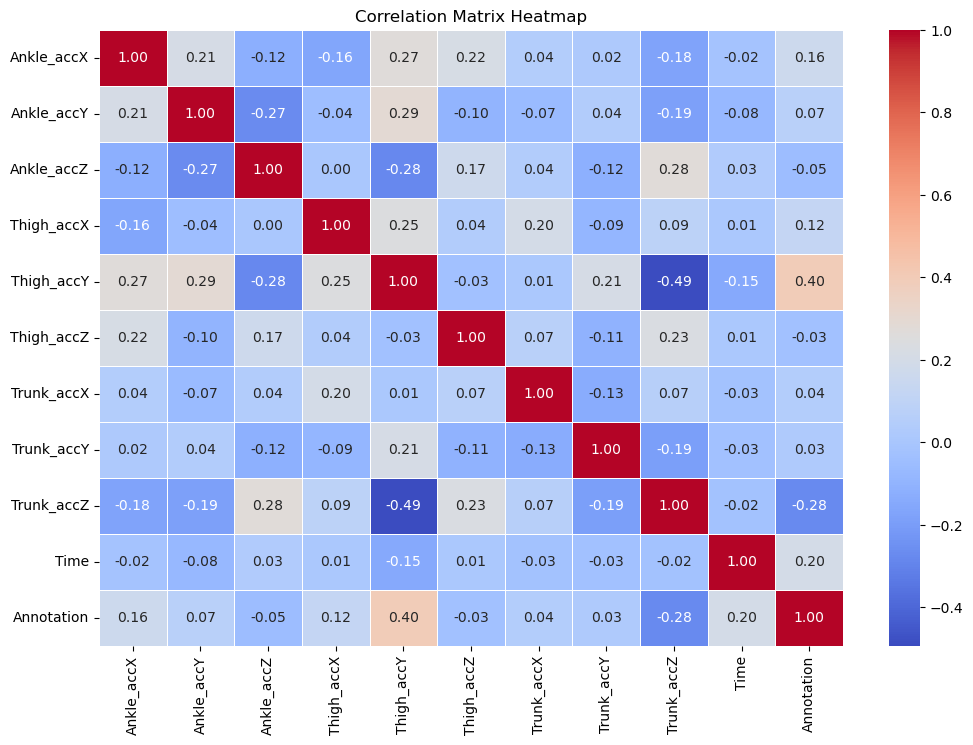

In [27]:
# Step 4: Calculate the correlation matrix
correlation_matrix = normalized_data.corr()

# Step 5: Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Optionally, display the correlation matrix as a heatmap (requires seaborn and matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title and show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y)

# Define the base models
print("Step 3: Defining base models")
base_models = [
    LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression
    LinearSVC(max_iter=1000, random_state=42),           # LinearSVC (faster)
    RandomForestClassifier(n_estimators=30, random_state=42, max_depth=10, n_jobs=-1),  # Random Forest
    lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1,
                       n_estimators=100, random_state=42)  # LightGBM
]

# Initialize KFold
print("Step 4: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare an array to store the predictions from base models
print("Step 5: Preparing storage for base model predictions")
base_model_predictions = np.zeros((X_train.shape[0], len(base_models)))

# Step 6: Training base models using KFold
print("Step 6: Training base models using KFold")
for i, model in enumerate(base_models):
    print(f"\nTraining base model {i + 1}: {type(model).__name__}")
    for train_index, val_index in kf.split(X_train):
        print(f"    Fold {kf.get_n_splits()} - Training and validating")
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        print(f"    Base model {i + 1} fitted")

        # Make predictions on the validation fold
        val_preds = model.predict(X_val_fold)
        print(f"    Predictions made for validation fold")

        # Store predictions
        base_model_predictions[val_index, i] = val_preds
        print(f"    Predictions stored for base model {i + 1}")

# Now base_model_predictions contains the out-of-fold predictions
print("Step 7: Out-of-fold predictions stored")

# Step 8: Training the Random Forest meta-learner
print("Step 8: Training the Random Forest meta-learner")
meta_X = pd.DataFrame(base_model_predictions, columns=[
                      f'base_model_{i + 1}' for i in range(len(base_models))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)
print("Meta-learner (Random Forest) trained")

# Step 9: Evaluating the model on the test dataset
print("Step 9: Evaluating the model on the test dataset")
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(base_models)))

# Prepare to store evaluation metrics for each base model
base_model_test_metrics = []

for i, model in enumerate(base_models):
    print(f"\nFitting base model {i + 1} on the entire training data")
    # Fit each model on the entire training data
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on the test set using base model {i + 1}")
    test_preds = model.predict(X_test)
    test_model_predictions[:, i] = test_preds

    # Evaluate the base model on the test set
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, average='weighted')
    recall = recall_score(y_test, test_preds, average='weighted')
    f1 = f1_score(y_test, test_preds, average='weighted')
    mae = mean_absolute_error(y_test, test_preds)

    # Store the metrics
    base_model_test_metrics.append({
        'Model': f'Base model {i + 1} ({type(model).__name__})',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Mean Absolute Error': mae
    })

    # Print the evaluation metrics for this base model
    print(f"Evaluation Metrics for Base model {i + 1} ({type(model).__name__}):")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall: {recall:.4f}")
    print(f"    F1 Score: {f1:.4f}")
    print(f"    Mean Absolute Error: {mae:.4f}")

# Optionally, display the metrics for all base models
print("\nSummary of Base Models' Performance on Test Set:")
base_model_metrics_df = pd.DataFrame(base_model_test_metrics)
print(base_model_metrics_df)

# Step 10: Creating DataFrame for test set predictions
print("Step 10: Creating DataFrame for test set predictions")
meta_test_X = pd.DataFrame(test_model_predictions, columns=[
                           f'base_model_{i + 1}' for i in range(len(base_models))])

# Step 11: Making final predictions using the meta-learner
print("Step 11: Making final predictions using the meta-learner")
final_predictions = meta_model.predict(meta_test_X)

# Step 12: Calculating evaluation metrics for meta-learner
print("Step 12: Calculating evaluation metrics for meta-learner")
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
mae = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics for meta-learner
print("\nMeta-learner (Random Forest) Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

print("Step 13: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Defining base models
Step 4: Initializing KFold
Step 5: Preparing storage for base model predictions
Step 6: Training base models using KFold

Training base model 1: LogisticRegression
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1

Tra

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Define the base models
print("Step 3: Defining base models")
base_models = [
    LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression
    LinearSVC(max_iter=1000, random_state=42),           # LinearSVC (faster)
    RandomForestClassifier(n_estimators=30, random_state=42, max_depth=10, n_jobs=-1),  # Random Forest
    lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1,
                       n_estimators=100, random_state=42)  # LightGBM
]

# Initialize KFold
print("Step 4: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare an array to store the predictions from base models
print("Step 5: Preparing storage for base model predictions")
base_model_predictions = np.zeros((X_train.shape[0], len(base_models)))

# Step 6: Training base models using KFold
print("Step 6: Training base models using KFold")
for i, model in enumerate(base_models):
    print(f"\nTraining base model {i + 1}: {type(model).__name__}")
    for train_index, val_index in kf.split(X_train):
        print(f"    Fold {kf.get_n_splits()} - Training and validating")
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        print(f"    Base model {i + 1} fitted")

        # Make predictions on the validation fold
        val_preds = model.predict(X_val_fold)
        print(f"    Predictions made for validation fold")

        # Store predictions
        base_model_predictions[val_index, i] = val_preds
        print(f"    Predictions stored for base model {i + 1}")

# Now base_model_predictions contains the out-of-fold predictions
print("Step 7: Out-of-fold predictions stored")

# Step 8: Training the Random Forest meta-learner
print("Step 8: Training the Random Forest meta-learner")
meta_X = pd.DataFrame(base_model_predictions, columns=[
                      f'base_model_{i + 1}' for i in range(len(base_models))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)
print("Meta-learner (Random Forest) trained")

# Step 9: Evaluating the model on the test dataset
print("Step 9: Evaluating the model on the test dataset")
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(base_models)))

# Prepare to store evaluation metrics for each base model
base_model_test_metrics = []

for i, model in enumerate(base_models):
    print(f"\nFitting base model {i + 1} on the entire training data")
    # Fit each model on the entire training data
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on the test set using base model {i + 1}")
    test_preds = model.predict(X_test)
    test_model_predictions[:, i] = test_preds

    # Evaluate the base model on the test set
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, average='weighted')
    recall = recall_score(y_test, test_preds, average='weighted')
    f1 = f1_score(y_test, test_preds, average='weighted')
    mae = mean_absolute_error(y_test, test_preds)

    # Store the metrics
    base_model_test_metrics.append({
        'Model': f'Base model {i + 1} ({type(model).__name__})',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Mean Absolute Error': mae
    })

    # Print the evaluation metrics for this base model
    print(f"Evaluation Metrics for Base model {i + 1} ({type(model).__name__}):")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall: {recall:.4f}")
    print(f"    F1 Score: {f1:.4f}")
    print(f"    Mean Absolute Error: {mae:.4f}")

# Optionally, display the metrics for all base models
print("\nSummary of Base Models' Performance on Test Set:")
base_model_metrics_df = pd.DataFrame(base_model_test_metrics)
print(base_model_metrics_df)

# Step 10: Creating DataFrame for test set predictions
print("Step 10: Creating DataFrame for test set predictions")
meta_test_X = pd.DataFrame(test_model_predictions, columns=[
                           f'base_model_{i + 1}' for i in range(len(base_models))])

# Step 11: Making final predictions using the meta-learner
print("Step 11: Making final predictions using the meta-learner")
final_predictions = meta_model.predict(meta_test_X)

# Step 12: Calculating evaluation metrics for meta-learner
print("Step 12: Calculating evaluation metrics for meta-learner")
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
mae = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics for meta-learner
print("\nMeta-learner (Random Forest) Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

print("Step 13: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Defining base models
Step 4: Initializing KFold
Step 5: Preparing storage for base model predictions
Step 6: Training base models using KFold

Training base model 1: LogisticRegression
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1

Tra

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Define the base models
print("Step 3: Defining base models")
base_models = [
    LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression
    LinearSVC(max_iter=1000, random_state=42),           # LinearSVC (faster)
    RandomForestClassifier(n_estimators=30, random_state=42, max_depth=10, n_jobs=-1),  # Random Forest
    lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1,
                       n_estimators=100, random_state=42)  # LightGBM
]

# Initialize KFold
print("Step 4: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare an array to store the predictions from base models
print("Step 5: Preparing storage for base model predictions")
base_model_predictions = np.zeros((X_train.shape[0], len(base_models)))

# Step 6: Training base models using KFold
print("Step 6: Training base models using KFold")
for i, model in enumerate(base_models):
    print(f"\nTraining base model {i + 1}: {type(model).__name__}")
    for train_index, val_index in kf.split(X_train):
        print(f"    Fold {kf.get_n_splits()} - Training and validating")
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        print(f"    Base model {i + 1} fitted")

        # Make predictions on the validation fold
        val_preds = model.predict(X_val_fold)
        print(f"    Predictions made for validation fold")

        # Store predictions
        base_model_predictions[val_index, i] = val_preds
        print(f"    Predictions stored for base model {i + 1}")

# Now base_model_predictions contains the out-of-fold predictions
print("Step 7: Out-of-fold predictions stored")

# Step 8: Training the Random Forest meta-learner
print("Step 8: Training the Random Forest meta-learner")
meta_X = pd.DataFrame(base_model_predictions, columns=[
                      f'base_model_{i + 1}' for i in range(len(base_models))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)
print("Meta-learner (Random Forest) trained")

# Step 9: Evaluating the model on the test dataset
print("Step 9: Evaluating the model on the test dataset")
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(base_models)))

# Prepare to store evaluation metrics for each base model
base_model_test_metrics = []

for i, model in enumerate(base_models):
    print(f"\nFitting base model {i + 1} on the entire training data")
    # Fit each model on the entire training data
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on the test set using base model {i + 1}")
    test_preds = model.predict(X_test)
    test_model_predictions[:, i] = test_preds

    # Evaluate the base model on the test set
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, average='weighted')
    recall = recall_score(y_test, test_preds, average='weighted')
    f1 = f1_score(y_test, test_preds, average='weighted')
    mae = mean_absolute_error(y_test, test_preds)

    # Store the metrics
    base_model_test_metrics.append({
        'Model': f'Base model {i + 1} ({type(model).__name__})',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Mean Absolute Error': mae
    })

    # Print the evaluation metrics for this base model
    print(f"Evaluation Metrics for Base model {i + 1} ({type(model).__name__}):")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall: {recall:.4f}")
    print(f"    F1 Score: {f1:.4f}")
    print(f"    Mean Absolute Error: {mae:.4f}")

# Optionally, display the metrics for all base models
print("\nSummary of Base Models' Performance on Test Set:")
base_model_metrics_df = pd.DataFrame(base_model_test_metrics)
print(base_model_metrics_df)

# Step 10: Creating DataFrame for test set predictions
print("Step 10: Creating DataFrame for test set predictions")
meta_test_X = pd.DataFrame(test_model_predictions, columns=[
                           f'base_model_{i + 1}' for i in range(len(base_models))])

# Step 11: Making final predictions using the meta-learner
print("Step 11: Making final predictions using the meta-learner")
final_predictions = meta_model.predict(meta_test_X)

# Step 12: Calculating evaluation metrics for meta-learner
print("Step 12: Calculating evaluation metrics for meta-learner")
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
mae = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics for meta-learner
print("\nMeta-learner (Random Forest) Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

print("Step 13: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Defining base models
Step 4: Initializing KFold
Step 5: Preparing storage for base model predictions
Step 6: Training base models using KFold

Training base model 1: LogisticRegression
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1

Tra

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y)

# Define the base models
print("Step 3: Defining base models")
base_models = [
    LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression
    LinearSVC(max_iter=1000, random_state=42),           # LinearSVC (faster)
    RandomForestClassifier(n_estimators=30, random_state=42, max_depth=10, n_jobs=-1),  # Random Forest
    lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1,
                       n_estimators=100, random_state=42)  # LightGBM
]

# Initialize KFold
print("Step 4: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare an array to store the predictions from base models
print("Step 5: Preparing storage for base model predictions")
base_model_predictions = np.zeros((X_train.shape[0], len(base_models)))

# Step 6: Training base models using KFold
print("Step 6: Training base models using KFold")
for i, model in enumerate(base_models):
    print(f"\nTraining base model {i + 1}: {type(model).__name__}")
    for train_index, val_index in kf.split(X_train):
        print(f"    Fold {kf.get_n_splits()} - Training and validating")
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit the model on the training fold
        model.fit(X_train_fold, y_train_fold)
        print(f"    Base model {i + 1} fitted")

        # Make predictions on the validation fold
        val_preds = model.predict(X_val_fold)
        print(f"    Predictions made for validation fold")

        # Store predictions
        base_model_predictions[val_index, i] = val_preds
        print(f"    Predictions stored for base model {i + 1}")

# Now base_model_predictions contains the out-of-fold predictions
print("Step 7: Out-of-fold predictions stored")

# Step 8: Training the Random Forest meta-learner
print("Step 8: Training the Random Forest meta-learner")
meta_X = pd.DataFrame(base_model_predictions, columns=[
                      f'base_model_{i + 1}' for i in range(len(base_models))])
meta_model = RandomForestClassifier(random_state=42)
meta_model.fit(meta_X, y_train)
print("Meta-learner (Random Forest) trained")

# Step 9: Evaluating the model on the test dataset
print("Step 9: Evaluating the model on the test dataset")
# Prepare test predictions using the base models
test_model_predictions = np.zeros((X_test.shape[0], len(base_models)))

# Prepare to store evaluation metrics for each base model
base_model_test_metrics = []

for i, model in enumerate(base_models):
    print(f"\nFitting base model {i + 1} on the entire training data")
    # Fit each model on the entire training data
    model.fit(X_train, y_train)

    # Predict on the test set
    print(f"Predicting on the test set using base model {i + 1}")
    test_preds = model.predict(X_test)
    test_model_predictions[:, i] = test_preds

    # Evaluate the base model on the test set
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds, average='weighted')
    recall = recall_score(y_test, test_preds, average='weighted')
    f1 = f1_score(y_test, test_preds, average='weighted')
    mae = mean_absolute_error(y_test, test_preds)

    # Store the metrics
    base_model_test_metrics.append({
        'Model': f'Base model {i + 1} ({type(model).__name__})',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Mean Absolute Error': mae
    })

    # Print the evaluation metrics for this base model
    print(f"Evaluation Metrics for Base model {i + 1} ({type(model).__name__}):")
    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall: {recall:.4f}")
    print(f"    F1 Score: {f1:.4f}")
    print(f"    Mean Absolute Error: {mae:.4f}")

# Optionally, display the metrics for all base models
print("\nSummary of Base Models' Performance on Test Set:")
base_model_metrics_df = pd.DataFrame(base_model_test_metrics)
print(base_model_metrics_df)

# Step 10: Creating DataFrame for test set predictions
print("Step 10: Creating DataFrame for test set predictions")
meta_test_X = pd.DataFrame(test_model_predictions, columns=[
                           f'base_model_{i + 1}' for i in range(len(base_models))])

# Step 11: Making final predictions using the meta-learner
print("Step 11: Making final predictions using the meta-learner")
final_predictions = meta_model.predict(meta_test_X)

# Step 12: Calculating evaluation metrics for meta-learner
print("Step 12: Calculating evaluation metrics for meta-learner")
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')
mae = mean_absolute_error(y_test, final_predictions)

# Print evaluation metrics for meta-learner
print("\nMeta-learner (Random Forest) Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

print("Step 13: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Defining base models
Step 4: Initializing KFold
Step 5: Preparing storage for base model predictions
Step 6: Training base models using KFold

Training base model 1: LogisticRegression
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1
    Fold 5 - Training and validating
    Base model 1 fitted
    Predictions made for validation fold
    Predictions stored for base model 1

Tra

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import xgboost as xgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the XGBoost model
print("Step 4: Initializing the XGBoost model")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the XGBoost model on the training fold
    print(f"    Training XGBoost on fold {fold + 1}")
    xgb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = xgb_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for XGBoost (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for XGBoost (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the XGBoost model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training XGBoost on fold 1

Fold 2:
    Training XGBoost on fold 2

Fold 3:
    Training XGBoost on fold 3

Fold 4:
    Training XGBoost on fold 4

Fold 5:
    Training XGBoost on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for XGBoost (Out-of-Fold predictions on training data):
Accuracy: 0.9042
Precision: 0.9060
Recall: 0.9042
F1 Score: 0.9039
Mean Absolute Error: 0.1120

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for XGBoost (Test data):
Accuracy: 0.9031
Precision: 0.9047
Recall: 0.9031
F1 Score: 0.9029
Mean Absolute Error: 0.1118
Step 8: Process completed


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import xgboost as xgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the XGBoost model
print("Step 4: Initializing the XGBoost model")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the XGBoost model on the training fold
    print(f"    Training XGBoost on fold {fold + 1}")
    xgb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = xgb_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for XGBoost (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for XGBoost (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the XGBoost model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training XGBoost on fold 1

Fold 2:
    Training XGBoost on fold 2

Fold 3:
    Training XGBoost on fold 3

Fold 4:
    Training XGBoost on fold 4

Fold 5:
    Training XGBoost on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for XGBoost (Out-of-Fold predictions on training data):
Accuracy: 0.9042
Precision: 0.9059
Recall: 0.9042
F1 Score: 0.9039
Mean Absolute Error: 0.1124

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for XGBoost (Test data):
Accuracy: 0.9034
Precision: 0.9049
Recall: 0.9034
F1 Score: 0.9032
Mean Absolute Error: 0.1116
Step 8: Process completed


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import xgboost as xgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the XGBoost model
print("Step 4: Initializing the XGBoost model")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the XGBoost model on the training fold
    print(f"    Training XGBoost on fold {fold + 1}")
    xgb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = xgb_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for XGBoost (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for XGBoost (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the XGBoost model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training XGBoost on fold 1

Fold 2:
    Training XGBoost on fold 2

Fold 3:
    Training XGBoost on fold 3

Fold 4:
    Training XGBoost on fold 4

Fold 5:
    Training XGBoost on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for XGBoost (Out-of-Fold predictions on training data):
Accuracy: 0.9035
Precision: 0.9054
Recall: 0.9035
F1 Score: 0.9033
Mean Absolute Error: 0.1129

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for XGBoost (Test data):
Accuracy: 0.9028
Precision: 0.9043
Recall: 0.9028
F1 Score: 0.9025
Mean Absolute Error: 0.1123
Step 8: Process completed


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import xgboost as xgb

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the XGBoost model
print("Step 4: Initializing the XGBoost model")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the XGBoost model on the training fold
    print(f"    Training XGBoost on fold {fold + 1}")
    xgb_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = xgb_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = xgb_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for XGBoost (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for XGBoost (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the XGBoost model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training XGBoost on fold 1

Fold 2:
    Training XGBoost on fold 2

Fold 3:
    Training XGBoost on fold 3

Fold 4:
    Training XGBoost on fold 4

Fold 5:
    Training XGBoost on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for XGBoost (Out-of-Fold predictions on training data):
Accuracy: 0.9040
Precision: 0.9058
Recall: 0.9040
F1 Score: 0.9037
Mean Absolute Error: 0.1120

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for XGBoost (Test data):
Accuracy: 0.9035
Precision: 0.9051
Recall: 0.9035
F1 Score: 0.9032
Mean Absolute Error: 0.1113
Step 8: Process completed


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the Random Forest model
print("Step 4: Initializing the Random Forest model")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Random Forest model on the training fold
    print(f"    Training Random Forest on fold {fold + 1}")
    rf_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = rf_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = rf_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for Random Forest (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for Random Forest (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the Random Forest model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training Random Forest on fold 1

Fold 2:
    Training Random Forest on fold 2

Fold 3:
    Training Random Forest on fold 3

Fold 4:
    Training Random Forest on fold 4

Fold 5:
    Training Random Forest on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for Random Forest (Out-of-Fold predictions on training data):
Accuracy: 0.8448
Precision: 0.8553
Recall: 0.8448
F1 Score: 0.8422
Mean Absolute Error: 0.1809

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for Random Forest (Test data):
Accuracy: 0.8440
Precision: 0.8536
Recall: 0.8440
F1 Score: 0.8416
Mean Absolute Error: 0.1804
Step 8: Process completed


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the Random Forest model
print("Step 4: Initializing the Random Forest model")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Random Forest model on the training fold
    print(f"    Training Random Forest on fold {fold + 1}")
    rf_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = rf_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = rf_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for Random Forest (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for Random Forest (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the Random Forest model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training Random Forest on fold 1

Fold 2:
    Training Random Forest on fold 2

Fold 3:
    Training Random Forest on fold 3

Fold 4:
    Training Random Forest on fold 4

Fold 5:
    Training Random Forest on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for Random Forest (Out-of-Fold predictions on training data):
Accuracy: 0.8450
Precision: 0.8558
Recall: 0.8450
F1 Score: 0.8425
Mean Absolute Error: 0.1806

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for Random Forest (Test data):
Accuracy: 0.8436
Precision: 0.8533
Recall: 0.8436
F1 Score: 0.8411
Mean Absolute Error: 0.1805
Step 8: Process completed


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the Random Forest model
print("Step 4: Initializing the Random Forest model")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Random Forest model on the training fold
    print(f"    Training Random Forest on fold {fold + 1}")
    rf_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = rf_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = rf_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for Random Forest (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for Random Forest (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the Random Forest model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training Random Forest on fold 1

Fold 2:
    Training Random Forest on fold 2

Fold 3:
    Training Random Forest on fold 3

Fold 4:
    Training Random Forest on fold 4

Fold 5:
    Training Random Forest on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for Random Forest (Out-of-Fold predictions on training data):
Accuracy: 0.8449
Precision: 0.8560
Recall: 0.8449
F1 Score: 0.8424
Mean Absolute Error: 0.1811

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for Random Forest (Test data):
Accuracy: 0.8436
Precision: 0.8535
Recall: 0.8436
F1 Score: 0.8411
Mean Absolute Error: 0.1809
Step 8: Process completed


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

# Step 1: Use the previously normalized data (via MinMaxScaler)
print("Step 1: Preparing data (features and target)")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target

# Step 2: Split the data into train and test sets (80-20 split)
print("Step 2: Splitting data into train and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Step 3: Initialize KFold Cross-Validation
print("Step 3: Initializing KFold")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Initialize the Random Forest model
print("Step 4: Initializing the Random Forest model")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Variables to store results across folds
oof_predictions = np.zeros(X_train.shape[0])  # Out-of-fold predictions for training set
test_predictions = np.zeros(X_test.shape[0])  # Test predictions

# Step 5: Perform K-Fold Cross-Validation
print("Step 5: Performing K-Fold Cross-Validation")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\nFold {fold + 1}:")

    # Split into training and validation folds
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the Random Forest model on the training fold
    print(f"    Training Random Forest on fold {fold + 1}")
    rf_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    val_preds = rf_model.predict(X_val_fold)
    oof_predictions[val_idx] = val_preds

    # Make predictions on the test set (for ensemble)
    test_preds = rf_model.predict(X_test)
    test_predictions += test_preds / kf.n_splits  # Average predictions over all folds

# Step 6: Calculate evaluation metrics on the validation (OOF) predictions
print("\nStep 6: Calculating evaluation metrics (OOF predictions)")
accuracy = accuracy_score(y_train, oof_predictions)
precision = precision_score(y_train, oof_predictions, average='weighted')
recall = recall_score(y_train, oof_predictions, average='weighted')
f1 = f1_score(y_train, oof_predictions, average='weighted')
map_score = mean_absolute_error(y_train, oof_predictions)

# Print evaluation metrics for OOF predictions
print("\nEvaluation Metrics for Random Forest (Out-of-Fold predictions on training data):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Mean Absolute Error: {map_score:.4f}")

# Step 7: Calculate evaluation metrics on the test set predictions
print("\nStep 7: Calculating evaluation metrics on the test set")
accuracy_test = accuracy_score(y_test, np.round(test_predictions))
precision_test = precision_score(y_test, np.round(test_predictions), average='weighted')
recall_test = recall_score(y_test, np.round(test_predictions), average='weighted')
f1_test = f1_score(y_test, np.round(test_predictions), average='weighted')
map_score_test = mean_absolute_error(y_test, np.round(test_predictions))

# Print evaluation metrics for test set
print("\nEvaluation Metrics for Random Forest (Test data):")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")

print("Step 8: Process completed")


Step 1: Preparing data (features and target)
Step 2: Splitting data into train and test sets
Step 3: Initializing KFold
Step 4: Initializing the Random Forest model
Step 5: Performing K-Fold Cross-Validation

Fold 1:
    Training Random Forest on fold 1

Fold 2:
    Training Random Forest on fold 2

Fold 3:
    Training Random Forest on fold 3

Fold 4:
    Training Random Forest on fold 4

Fold 5:
    Training Random Forest on fold 5

Step 6: Calculating evaluation metrics (OOF predictions)

Evaluation Metrics for Random Forest (Out-of-Fold predictions on training data):
Accuracy: 0.8452
Precision: 0.8562
Recall: 0.8452
F1 Score: 0.8426
Mean Absolute Error: 0.1802

Step 7: Calculating evaluation metrics on the test set

Evaluation Metrics for Random Forest (Test data):
Accuracy: 0.8442
Precision: 0.8542
Recall: 0.8442
F1 Score: 0.8417
Mean Absolute Error: 0.1800
Step 8: Process completed


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2514
[LightGBM] [Info] Number of data points in the train set: 1550451, number of used features: 10
[LightGBM] [Info] Start training from score -1.098340
[LightGBM] [Info] Start training from score -1.095321
[LightGBM] [Info] Start training from score -1.102189
Fold 1 - Accuracy: 0.9366, Precision: 0.9368, Recall: 0.9366, F1: 0.9366, MAE: 0.0747

Training on Fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 1550451, number of used features: 10
[LightGBM] [Info] Start training from score -1.098293
[LightGBM] [Info] Start trai

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2516
[LightGBM] [Info] Number of data points in the train set: 1356644, number of used features: 10
[LightGBM] [Info] Start training from score -1.098132
[LightGBM] [Info] Start training from score -1.095047
[LightGBM] [Info] Start training from score -1.102673
Fold 1 - Accuracy: 0.9357, Precision: 0.9359, Recall: 0.9357, F1: 0.9358, MAE: 0.0753

Training on Fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2512
[LightGBM] [Info] Number of data points in the train set: 1356645, number of used features: 10
[LightGBM] [Info] Start training from score -1.098615
[LightGBM] [Info] Start trai

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2515
[LightGBM] [Info] Number of data points in the train set: 1162838, number of used features: 10
[LightGBM] [Info] Start training from score -1.098191
[LightGBM] [Info] Start training from score -1.095302
[LightGBM] [Info] Start training from score -1.102357
Fold 1 - Accuracy: 0.9365, Precision: 0.9367, Recall: 0.9365, F1: 0.9366, MAE: 0.0743

Training on Fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 1162838, number of used features: 10
[LightGBM] [Info] Start training from score -1.097949
[LightGBM] [Info] Start trai

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
import lightgbm as lgb

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LightGBM model
    model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = lgb.LGBMClassifier(num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2515
[LightGBM] [Info] Number of data points in the train set: 969032, number of used features: 10
[LightGBM] [Info] Start training from score -1.097386
[LightGBM] [Info] Start training from score -1.095573
[LightGBM] [Info] Start training from score -1.102893
Fold 1 - Accuracy: 0.9363, Precision: 0.9365, Recall: 0.9363, F1: 0.9364, MAE: 0.0742

Training on Fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 969032, number of used features: 10
[LightGBM] [Info] Start training from score -1.098190
[LightGBM] [Info] Start traini

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.svm import LinearSVC  # Importing LinearSVC for faster performance

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set using LinearSVC
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LinearSVC model (faster version of SVM)
    model = LinearSVC(max_iter=1000, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = LinearSVC(max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
Fold 1 - Accuracy: 0.5930, Precision: 0.6004, Recall: 0.5930, F1: 0.5843, MAE: 0.5229

Training on Fold 2
Fold 2 - Accuracy: 0.5934, Precision: 0.6009, Recall: 0.5934, F1: 0.5848, MAE: 0.5226

Training on Fold 3
Fold 3 - Accuracy: 0.5930, Precision: 0.5996, Recall: 0.5930, F1: 0.5843, MAE: 0.5234

Training on Fold 4
Fold 4 - Accuracy: 0.5925, Precision: 0.5997, Recall: 0.5925, F1: 0.5840, MAE: 0.5237

Training on Fold 5
Fold 5 - Accuracy: 0.5933, Precision: 0.6010, Recall: 0.5933, F1: 0.5848, MAE: 0.5224

Average Metrics Across All Folds (Training Data):
Average Accuracy: 0.5930
Average Precision: 0.6003
Average Recall: 0.5930
Average F1 Score: 0.5844
Average Mean Absolute Error: 0.5230

Evaluating the model on the test set

Test Set Evaluation Metrics:
Accuracy: 0.5929
Precision: 0.6006
Recall: 0.5929
F1 Score: 0.5844
Mean Absolute Error: 0.5238


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.svm import LinearSVC  # Importing LinearSVC for faster performance

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set using LinearSVC
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LinearSVC model (faster version of SVM)
    model = LinearSVC(max_iter=1000, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = LinearSVC(max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
Fold 1 - Accuracy: 0.5931, Precision: 0.6005, Recall: 0.5931, F1: 0.5844, MAE: 0.5232

Training on Fold 2
Fold 2 - Accuracy: 0.5910, Precision: 0.5983, Recall: 0.5910, F1: 0.5824, MAE: 0.5254

Training on Fold 3
Fold 3 - Accuracy: 0.5940, Precision: 0.6012, Recall: 0.5940, F1: 0.5853, MAE: 0.5217

Training on Fold 4
Fold 4 - Accuracy: 0.5921, Precision: 0.5991, Recall: 0.5921, F1: 0.5835, MAE: 0.5241

Training on Fold 5
Fold 5 - Accuracy: 0.5932, Precision: 0.6007, Recall: 0.5932, F1: 0.5844, MAE: 0.5227

Average Metrics Across All Folds (Training Data):
Average Accuracy: 0.5927
Average Precision: 0.6000
Average Recall: 0.5927
Average F1 Score: 0.5840
Average Mean Absolute Error: 0.5234

Evaluating the model on the test set

Test Set Evaluation Metrics:
Accuracy: 0.5928
Precision: 0.6006
Recall: 0.5928
F1 Score: 0.5842
Mean Absolute Error: 0.5240


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.svm import LinearSVC  # Importing LinearSVC for faster performance

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set using LinearSVC
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LinearSVC model (faster version of SVM)
    model = LinearSVC(max_iter=1000, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = LinearSVC(max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
Fold 1 - Accuracy: 0.5933, Precision: 0.6003, Recall: 0.5933, F1: 0.5846, MAE: 0.5225

Training on Fold 2
Fold 2 - Accuracy: 0.5927, Precision: 0.6003, Recall: 0.5927, F1: 0.5841, MAE: 0.5234

Training on Fold 3
Fold 3 - Accuracy: 0.5936, Precision: 0.6010, Recall: 0.5936, F1: 0.5850, MAE: 0.5230

Training on Fold 4
Fold 4 - Accuracy: 0.5930, Precision: 0.6001, Recall: 0.5930, F1: 0.5844, MAE: 0.5223

Training on Fold 5
Fold 5 - Accuracy: 0.5933, Precision: 0.6006, Recall: 0.5933, F1: 0.5846, MAE: 0.5235

Average Metrics Across All Folds (Training Data):
Average Accuracy: 0.5932
Average Precision: 0.6005
Average Recall: 0.5932
Average F1 Score: 0.5845
Average Mean Absolute Error: 0.5230

Evaluating the model on the test set

Test Set Evaluation Metrics:
Accuracy: 0.5930
Precision: 0.6005
Recall: 0.5930
F1 Score: 0.5844
Mean Absolute Error: 0.5234


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error
from sklearn.svm import LinearSVC  # Importing LinearSVC for faster performance

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
print("Step 1: Splitting data into train and test sets")
X = normalized_data.drop(columns=['Annotation'])  # Features
y = normalized_data['Annotation']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
map_list = []

# Step 2: Perform K-Fold cross-validation on the training set using LinearSVC
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"\nTraining on Fold {fold + 1}")

    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Initialize the LinearSVC model (faster version of SVM)
    model = LinearSVC(max_iter=1000, random_state=42)

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    val_preds = model.predict(X_val_fold)

    # Step 3: Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val_fold, val_preds)
    precision = precision_score(y_val_fold, val_preds, average='weighted')
    recall = recall_score(y_val_fold, val_preds, average='weighted')
    f1 = f1_score(y_val_fold, val_preds, average='weighted')
    map_score = mean_absolute_error(y_val_fold, val_preds)

    # Append the metrics to their respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    map_list.append(map_score)

    # Print metrics for the current fold
    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, MAE: {map_score:.4f}")

# Step 4: Calculate and print the average metrics across all folds
print("\nAverage Metrics Across All Folds (Training Data):")
print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Average Precision: {np.mean(precision_list):.4f}")
print(f"Average Recall: {np.mean(recall_list):.4f}")
print(f"Average F1 Score: {np.mean(f1_list):.4f}")
print(f"Average Mean Absolute Error: {np.mean(map_list):.4f}")

# Step 5: Test the model on the test set
print("\nEvaluating the model on the test set")

# Train the model on the entire training data
final_model = LinearSVC(max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_preds = final_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy_test = accuracy_score(y_test, test_preds)
precision_test = precision_score(y_test, test_preds, average='weighted')
recall_test = recall_score(y_test, test_preds, average='weighted')
f1_test = f1_score(y_test, test_preds, average='weighted')
map_score_test = mean_absolute_error(y_test, test_preds)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Mean Absolute Error: {map_score_test:.4f}")


Step 1: Splitting data into train and test sets

Training on Fold 1
Fold 1 - Accuracy: 0.5928, Precision: 0.5997, Recall: 0.5928, F1: 0.5842, MAE: 0.5227

Training on Fold 2
Fold 2 - Accuracy: 0.5928, Precision: 0.6001, Recall: 0.5928, F1: 0.5840, MAE: 0.5229

Training on Fold 3
Fold 3 - Accuracy: 0.5926, Precision: 0.5996, Recall: 0.5926, F1: 0.5839, MAE: 0.5238

Training on Fold 4
Fold 4 - Accuracy: 0.5931, Precision: 0.6004, Recall: 0.5931, F1: 0.5845, MAE: 0.5235

Training on Fold 5
Fold 5 - Accuracy: 0.5936, Precision: 0.6013, Recall: 0.5936, F1: 0.5849, MAE: 0.5227

Average Metrics Across All Folds (Training Data):
Average Accuracy: 0.5930
Average Precision: 0.6002
Average Recall: 0.5930
Average F1 Score: 0.5843
Average Mean Absolute Error: 0.5231

Evaluating the model on the test set

Test Set Evaluation Metrics:
Accuracy: 0.5929
Precision: 0.6004
Recall: 0.5929
F1 Score: 0.5844
Mean Absolute Error: 0.5235
